## 1. Import and Install Dependencies

In [4]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached numpy-1.19.5-cp39-cp39-win_amd64.whl (13.3 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.1.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached cachetools-4.2.2-py3-none-any.whl (11 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 

You should consider upgrading via the 'e:\github\sign language detection\sign language detection\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'e:\github\sign language detection\sign language detection\venv\scripts\python.exe -m pip install --upgrade pip' command.



  Using cached opencv_python-4.5.3.56-cp39-cp39-win_amd64.whl (34.9 MB)
  Using cached mediapipe-0.8.7.3-cp39-cp39-win_amd64.whl (46.3 MB)
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1317 sha256=051c65554ad1112f3c9e0e9ee6c950e2e30b425313deb2c2f660505547a2f1d3
  Stored in directory: c:\users\puthr\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

## 2. Keypoints using MP Holistic

In [9]:
mp_holistic = mp.solutions.holistic   # Holistic model
mp_drawing = mp.solutions.drawing_utils   # Drawing utilities

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Color Conversion
    image.flags.writeable = False                   # Image is not writeable
    results = model.process(image)                  # Model prediction
    image.flags.writeable = True                    # Image is writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Color Conversion
    return image, results

In [33]:
# Standard landmark function
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks( image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)             # Draw Face Connection
    mp_drawing.draw_landmarks( image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)             # Draw Pose Connection
    mp_drawing.draw_landmarks( image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)        # Draw Left Hand Connection
    mp_drawing.draw_landmarks( image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)       # Draw Right Hand Connection

In [36]:
# Styled landmark function
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks( image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                                mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)   
                             )             # Draw Face Connection
    mp_drawing.draw_landmarks( image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                                mp_drawing.DrawingSpec(color=(90, 25, 12), thickness=2, circle_radius=3)
                            )             # Draw Pose Connection
    mp_drawing.draw_landmarks( image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                                mp_drawing.DrawingSpec(color=(90, 25, 12), thickness=2, circle_radius=3)
                            )        # Draw Left Hand Connection
    mp_drawing.draw_landmarks( image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(10, 220, 100), thickness=2, circle_radius=4),
                                mp_drawing.DrawingSpec(color=(256, 20, 200), thickness=2, circle_radius=3)
                            )       # Draw Right Hand Connection

In [37]:
# Capture the feed from camera source 0 i.e, web cam.
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence= 0.5, min_tracking_confidence= 0.5) as holistic:
    while cap.isOpened():

        # Read the feed from the web cam
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        # print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to the screen
        cv2.imshow("OpenCV Feed", image)
        # Breaking the loop gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
# Release the web cam
cap.release()
# Close the windows
cv2.destroyAllWindows()

In [30]:
draw_landmarks(image, results)

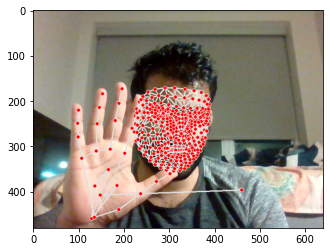

In [31]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## 3. Extract Keypoint Values

In [46]:
print(len(results.face_landmarks.landmark))
print(len(results.pose_landmarks.landmark))
print(len(results.left_hand_landmarks.landmark))

468
33


AttributeError: 'NoneType' object has no attribute 'landmark'

In [47]:
# Added if condition in order to avoid getting error 
# since it is possible to get back null array if the body features are not available in the frames.
# Pose landmarks has shape(33 landmarks * 4 landmarks values). 
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
# Face landmarks has shape(468 landmarks * 3 landmarks values).
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
# Left Hand landmarks has shape(21 landmarks * 3 landmarks values).
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
# Right Hand landmarks has shape(21 landmarks * 3 landmarks values).
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
def extract_keypoints(results):
    # Added if condition in order to avoid getting error 
    # since it is possible to get back null array if the body features are not available in the frames.
    # Pose landmarks has shape(33 landmarks * 4 landmarks values). 
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    # Face landmarks has shape(468 landmarks * 3 landmarks values).
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    # Left Hand landmarks has shape(21 landmarks * 3 landmarks values).
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    # Right Hand landmarks has shape(21 landmarks * 3 landmarks values).
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

## 4. Setup folders for collections